In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/time-series-analysis/deliveries.csv
/kaggle/input/time-series-analysis/login.csv
/kaggle/input/time-series-analysis/google.csv


In [2]:
pd.read_csv("/kaggle/input/time-series-analysis/google.csv")

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897
3,2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276
...,...,...,...,...,...,...,...
4466,2022-05-16,2307.679932,2332.149902,2286.699951,2295.850098,2295.850098,1164100
4467,2022-05-17,2344.550049,2344.550049,2306.750000,2334.030029,2334.030029,1078800
4468,2022-05-18,2304.750000,2313.913086,2242.840088,2248.020020,2248.020020,1399100
4469,2022-05-19,2236.820068,2271.750000,2209.360107,2214.909912,2214.909912,1459600


In [3]:
#for  sigle time to store we use timestamp
pd.Timestamp("20 mar 2024 13:33").month
# for muliple  we use DatetimeIndex  also we make this datetime index as index of out datefremes or series 
pd.DatetimeIndex([pd.Timestamp("20 mar 2024 13:33"),pd.Timestamp("20 mar 2024 13:34"),pd.Timestamp("20 mar 2024 13:36")])
#data_range()   is used to get all the dates from one range to another 
pd.date_range(start="2024-01-01",end="2024-03-20" ,freq="D")
#to_datetime()  convert it to tatetime object
s=["2024/01/20","2024/02/20","2024/03/20"]
s# as its a sting we need to convert it to datetime 
pd.to_datetime(s)
# to fech details form this 
# pd.to_datetime(s).dt.day_name() dt accesor dont work always 
pd.to_datetime(s).month_name()
pd.to_datetime(s).day_name()

Index(['Saturday', 'Tuesday', 'Wednesday'], dtype='object')

In [4]:
#Time Delta
# represents a duration ,i.e diffrence between two dates or time

t1= pd.Timestamp("20 mar 2024 13:33")
t2= pd.Timestamp("20 mar 2024 10:33")

t1-t2  



Timedelta('0 days 03:00:00')

# arithemetic 

In [5]:
pd.Timedelta(days=2 ,hours =10,minutes=35)

Timedelta('2 days 10:35:00')

In [6]:
pd.Timestamp("20 mar 2024 13:33")+pd.Timedelta(days=2 ,hours =10,minutes=35)


Timestamp('2024-03-23 00:08:00')

In [7]:
pd.date_range(start="2024-01-01",end="2024-03-20" ,freq="D")+pd.Timedelta(days=2 ,hours =10,minutes=35)


DatetimeIndex(['2024-01-03 10:35:00', '2024-01-04 10:35:00',
               '2024-01-05 10:35:00', '2024-01-06 10:35:00',
               '2024-01-07 10:35:00', '2024-01-08 10:35:00',
               '2024-01-09 10:35:00', '2024-01-10 10:35:00',
               '2024-01-11 10:35:00', '2024-01-12 10:35:00',
               '2024-01-13 10:35:00', '2024-01-14 10:35:00',
               '2024-01-15 10:35:00', '2024-01-16 10:35:00',
               '2024-01-17 10:35:00', '2024-01-18 10:35:00',
               '2024-01-19 10:35:00', '2024-01-20 10:35:00',
               '2024-01-21 10:35:00', '2024-01-22 10:35:00',
               '2024-01-23 10:35:00', '2024-01-24 10:35:00',
               '2024-01-25 10:35:00', '2024-01-26 10:35:00',
               '2024-01-27 10:35:00', '2024-01-28 10:35:00',
               '2024-01-29 10:35:00', '2024-01-30 10:35:00',
               '2024-01-31 10:35:00', '2024-02-01 10:35:00',
               '2024-02-02 10:35:00', '2024-02-03 10:35:00',
               '2024-02-

In [8]:
df= pd.read_csv("/kaggle/input/time-series-analysis/deliveries.csv")
df.head()

,order_date,delivery_date
0,5/24/98,2/5/99
1,4/22/92,3/6/98
2,2/10/91,8/26/92
3,7/21/92,11/20/97
4,9/2/93,6/10/98


In [9]:
# find the average time for the delivery time  


df.shape

(501, 2)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   order_date     501 non-null    object
 1   delivery_date  501 non-null    object
dtypes: object(2)
memory usage: 8.0+ KB


In [11]:
df["order_date"] = pd.to_datetime(df["order_date"])
df["delivery_date"] = pd.to_datetime(df["delivery_date"])

/tmp/ipykernel_18/1045838049.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["order_date"] = pd.to_datetime(df["order_date"])
/tmp/ipykernel_18/1045838049.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["delivery_date"] = pd.to_datetime(df["delivery_date"])


In [12]:
#df["order_date"]-df["delivery_date"]  # evry item is time stamp so now im goint o store it in a variable 
df["delivery_time_period"] = df["order_date"] - df["delivery_date"] 
df["delivery_time_period"].mean()  #eaverage time for the delivery time  

Timedelta('-1218 days +01:06:06.467065872')

**Time series**
A time series is a data set that tracks a sample over time. In particular, a time series allows one to see what factors influence certain variables from period to period. Time series analysis can be useful to see how a given asset, security, or economic variable changes over time.

Examples

* Financial Data (Company stocks)
* Natural Data (Rainfall measurement)
* Event Data (Covid)
* Medical Data (Heart rate monitoring)

**Types of Operations done on Time Series
**
* Time Series Analysis
* Time Series Forecasting

In [13]:
df = pd.read_csv("/kaggle/input/time-series-analysis/google.csv")

In [14]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
4466,2022-05-16,2307.679932,2332.149902,2286.699951,2295.850098,2295.850098,1164100
4467,2022-05-17,2344.550049,2344.550049,2306.750000,2334.030029,2334.030029,1078800
4468,2022-05-18,2304.750000,2313.913086,2242.840088,2248.020020,2248.020020,1399100
4469,2022-05-19,2236.820068,2271.750000,2209.360107,2214.909912,2214.909912,1459600
4470,2022-05-20,2241.709961,2251.000000,2127.459961,2186.260010,2186.260010,1878100


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4471 entries, 0 to 4470
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4471 non-null   object 
 1   Open       4471 non-null   float64
 2   High       4471 non-null   float64
 3   Low        4471 non-null   float64
 4   Close      4471 non-null   float64
 5   Adj Close  4471 non-null   float64
 6   Volume     4471 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 244.6+ KB


In [16]:
# Date   is   object  we need to convert it to date time 
df["Date"]=pd.to_datetime(df["Date"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4471 entries, 0 to 4470
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       4471 non-null   datetime64[ns]
 1   Open       4471 non-null   float64       
 2   High       4471 non-null   float64       
 3   Low        4471 non-null   float64       
 4   Close      4471 non-null   float64       
 5   Adj Close  4471 non-null   float64       
 6   Volume     4471 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 244.6 KB


In [17]:
df.set_index("Date",inplace=True)


In [18]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897
2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808
2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276


In [19]:
#Fects a data on specific date 

df.loc["2021-12-31"]

Open           2910.879883
High           2927.300049
Low            2893.550049
Close          2893.590088
Adj Close      2893.590088
Volume       864900.000000
Name: 2021-12-31 00:00:00, dtype: float64

In [20]:
#partial indexing -> select a particualr year or motnh
df.loc["2020-12"]  # 12 is month we got data untill 12 th month
df.loc["2022"]   # basicalyy FILTERING

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,2889.510010,2911.000000,2870.050049,2901.489990,2901.489990,1260700
2022-01-04,2911.010010,2932.199951,2876.322998,2888.330078,2888.330078,1146400
2022-01-05,2883.620117,2885.959961,2750.469971,2753.070068,2753.070068,2482100
2022-01-06,2749.949951,2793.719971,2735.270020,2751.020020,2751.020020,1452500
2022-01-07,2758.100098,2765.094971,2715.780029,2740.090088,2740.090088,970400
...,...,...,...,...,...,...
2022-05-16,2307.679932,2332.149902,2286.699951,2295.850098,2295.850098,1164100
2022-05-17,2344.550049,2344.550049,2306.750000,2334.030029,2334.030029,1078800
2022-05-18,2304.750000,2313.913086,2242.840088,2248.020020,2248.020020,1399100


In [21]:
# creating columns from my  date index -motnh name and dayname

df.index.month_name()
df["monthname"] = df.index.month_name()
df["dayname"]   = df.index.day_name()
df["quarter"]   =     df.index.quarter
df.tail()

,Open,High,Low,Close,Adj Close,Volume,monthname,dayname,quarter
Date,,,,,,,,,
2022-05-16,2307.679932,2332.149902,2286.699951,2295.850098,2295.850098,1164100,May,Monday,2
2022-05-17,2344.550049,2344.550049,2306.750000,2334.030029,2334.030029,1078800,May,Tuesday,2
2022-05-18,2304.750000,2313.913086,2242.840088,2248.020020,2248.020020,1399100,May,Wednesday,2
2022-05-19,2236.820068,2271.750000,2209.360107,2214.909912,2214.909912,1459600,May,Thursday,2
2022-05-20,2241.709961,2251.000000,2127.459961,2186.260010,2186.260010,1878100,May,Friday,2


In [22]:
df.loc["2022-01-01":"2022-05-20":5]

,Open,High,Low,Close,Adj Close,Volume,monthname,dayname,quarter
Date,,,,,,,,,
2022-01-03,2889.510010,2911.000000,2870.050049,2901.489990,2901.489990,1260700,January,Monday,1
2022-01-10,2701.979980,2772.800049,2662.810059,2771.479980,2771.479980,1704800,January,Monday,1
2022-01-18,2732.000000,2747.830078,2712.340088,2725.810059,2725.810059,1369100,January,Tuesday,1
2022-01-25,2568.709961,2586.770020,2527.560059,2534.709961,2534.709961,1800400,January,Tuesday,1
2022-02-01,2756.699951,2764.000000,2691.364990,2757.570068,2757.570068,2560200,February,Tuesday,1
2022-02-08,2779.824951,2796.741943,2737.459961,2784.260010,2784.260010,1712800,February,Tuesday,1
2022-02-15,2749.429932,2758.000000,2710.790039,2728.510010,2728.510010,1328900,February,Tuesday,1
2022-02-23,2621.570068,2634.979980,2550.070068,2551.699951,2551.699951,1321600,February,Wednesday,1
2022-03-02,2692.165039,2712.310059,2668.649902,2695.030029,2695.030029,1198300,March,Wednesday,1


In [23]:
# fetch info for a particular date  of every year   limitation time delta
rnge = pd.date_range(start='2004-03-31',end="2022-03-31",freq= pd.DateOffset(years=1))

fincial_year_end =df[df.index.isin(rnge)]

fincial_year_end

,Open,High,Low,Close,Adj Close,Volume,monthname,dayname,quarter
Date,,,,,,,,,
2005-03-31,88.642746,90.356323,88.488327,89.917969,89.917969,13587941,March,Thursday,1
2006-03-31,193.644180,195.203323,191.297974,194.271820,194.271820,73316582,March,Friday,1
2008-03-31,217.006607,220.518448,215.198380,219.412582,219.412582,8926132,March,Monday,1
2009-03-31,173.813507,176.094955,172.443634,173.380127,173.380127,7338002,March,Tuesday,1
2010-03-31,281.469971,283.806213,280.354156,282.501129,282.501129,6084320,March,Wednesday,1
2011-03-31,290.411469,292.981842,289.783813,292.284454,292.284454,4074013,March,Thursday,1
2014-03-31,565.337891,565.447571,555.405151,555.445007,555.445007,10830,March,Monday,1
2015-03-31,548.494080,553.191223,545.223083,546.499573,546.499573,1588048,March,Tuesday,1
2016-03-31,749.250000,750.849976,740.940002,744.950012,744.950012,1718800,March,Thursday,1


<Axes: xlabel='Date'>

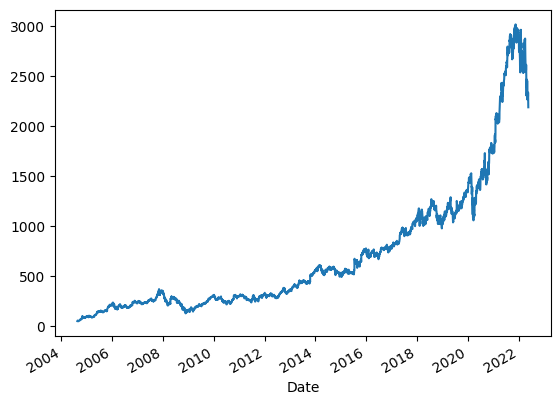

In [24]:
#vizualization on a single column

df["Close"].plot()          # we can simply see how its increasing and decreasing over the year 

In [25]:
# viz all cols together
"""subset_yt = fincial_year_end[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'monthname',
       'dayname', 'quarter']]
ax = subset_yt.plot(subplots=True,
                    layout=(3, 3),
                     sharex=False,
                     sharey=False,
                     linewidth=0.7,
                     fontsize=10,
                     legend=False,
                      figsize=(20,10),
                      title=['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'monthname',
       'dayname', 'quarter'])"""

"subset_yt = fincial_year_end[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'monthname',\n       'dayname', 'quarter']]\nax = subset_yt.plot(subplots=True,\n                    layout=(3, 3),\n                     sharex=False,\n                     sharey=False,\n                     linewidth=0.7,\n                     fontsize=10,\n                     legend=False,\n                      figsize=(20,10),\n                      title=['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'monthname',\n       'dayname', 'quarter'])"

<Axes: xlabel='Date'>

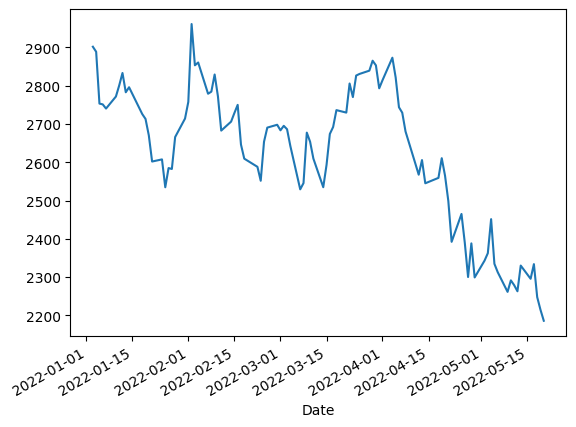

In [26]:
# yearly trend 
df.loc["2022"]["Close"].plot()


<Axes: xlabel='Date'>

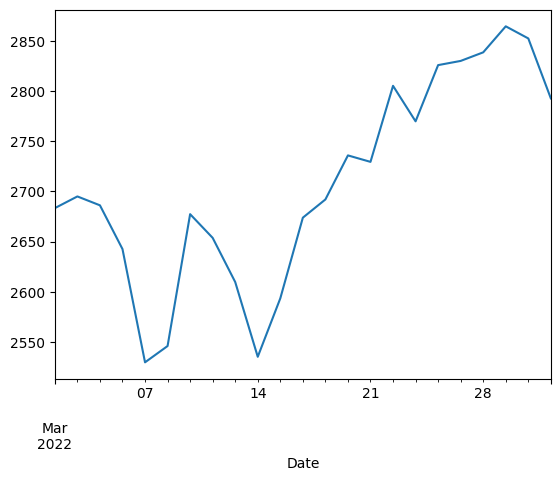

In [27]:
#monthly trend
df.loc["2022-3"]["Close"].plot() 

<Axes: xlabel='Date'>

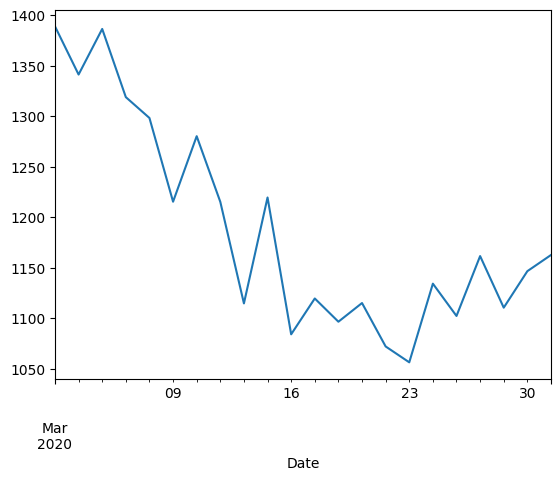

In [28]:
df.loc["2020-3"]["Close"].plot()   # covid time 

<Axes: xlabel='monthname'>

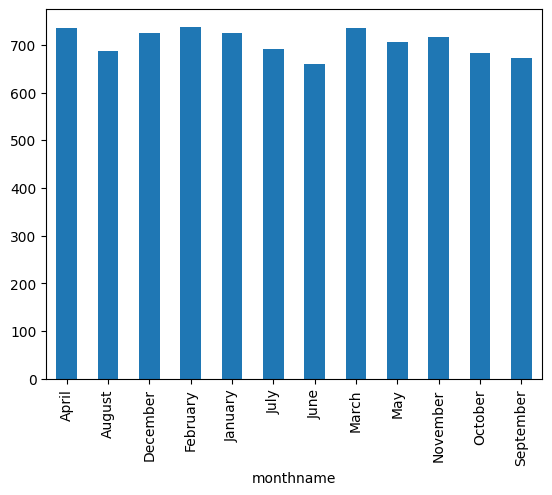

In [29]:
"month by moont trend"
df.groupby('monthname')['Close'].mean().plot(kind='bar')

<Axes: xlabel='dayname'>

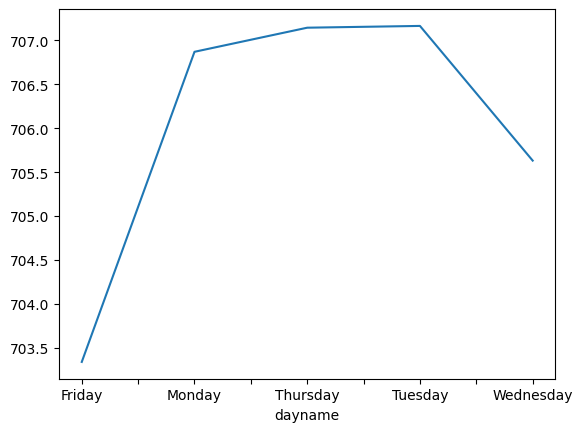

In [30]:
# weeks days yearly trend
df.groupby('dayname')['Close'].mean().plot()

<Axes: xlabel='quarter'>

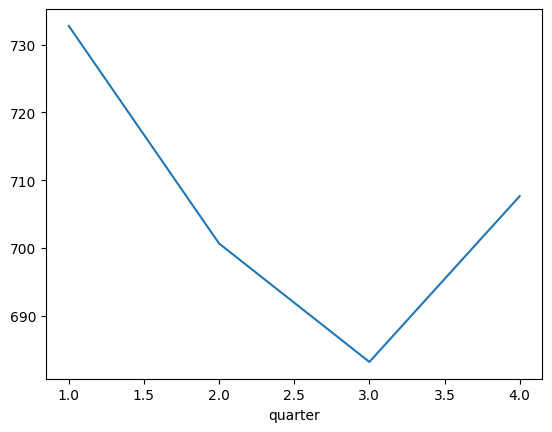

In [31]:
df.groupby('quarter')['Close'].mean().plot()

**Resampling**
Resampling involves changing the frequency of your time series observations.

*Two types of resampling are:*

* Upsampling: Where you increase the frequency of the samples, such as from minutes to seconds.
* Downsampling: Where you decrease the frequency of the samples, such as from days to months.

In [32]:
#frequency
df.index
#see the pandas count i dentify the frequency when convering to datetime dats why freq=None

DatetimeIndex(['2004-08-19', '2004-08-20', '2004-08-23', '2004-08-24',
               '2004-08-25', '2004-08-26', '2004-08-27', '2004-08-30',
               '2004-08-31', '2004-09-01',
               ...
               '2022-05-09', '2022-05-10', '2022-05-11', '2022-05-12',
               '2022-05-13', '2022-05-16', '2022-05-17', '2022-05-18',
               '2022-05-19', '2022-05-20'],
              dtype='datetime64[ns]', name='Date', length=4471, freq=None)

In [33]:
df =df.asfreq("B")# "B"= bissness days and "D"=days for normal days 
df.index

DatetimeIndex(['2004-08-19', '2004-08-20', '2004-08-23', '2004-08-24',
               '2004-08-25', '2004-08-26', '2004-08-27', '2004-08-30',
               '2004-08-31', '2004-09-01',
               ...
               '2022-05-09', '2022-05-10', '2022-05-11', '2022-05-12',
               '2022-05-13', '2022-05-16', '2022-05-17', '2022-05-18',
               '2022-05-19', '2022-05-20'],
              dtype='datetime64[ns]', name='Date', length=4632, freq='B')

In [34]:
#  "Q" for quater 
df_quater=df.asfreq("Q")
df_quater

/tmp/ipykernel_18/4244637636.py:2: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df_quater=df.asfreq("Q")


,Open,High,Low,Close,Adj Close,Volume,monthname,dayname,quarter
Date,,,,,,,,,
2004-09-30,64.707458,65.902977,64.259140,64.558022,64.558022,13823420.0,September,Thursday,3.0
2004-12-31,99.243011,99.566795,95.920464,96.035034,96.035034,15394487.0,December,Friday,4.0
2005-03-31,88.642746,90.356323,88.488327,89.917969,89.917969,13587941.0,March,Thursday,1.0
2005-06-30,146.620438,148.906860,144.976593,146.525787,146.525787,30301955.0,June,Thursday,2.0
2005-09-30,156.523315,158.157181,155.561920,157.639130,157.639130,18371203.0,September,Friday,3.0
...,...,...,...,...,...,...,...,...,...
2021-03-31,2059.120117,2093.326904,2056.745117,2068.629883,2068.629883,1459900.0,March,Wednesday,1.0
2021-06-30,2513.071045,2516.000000,2495.149902,2506.320068,2506.320068,1200300.0,June,Wednesday,2.0
2021-09-30,2686.500000,2711.800049,2660.000000,2665.310059,2665.310059,1764700.0,September,Thursday,3.0


In [35]:
df_year=df.asfreq("Y")
df_year

/tmp/ipykernel_18/3663842671.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_year=df.asfreq("Y")


,Open,High,Low,Close,Adj Close,Volume,monthname,dayname,quarter
Date,,,,,,,,,
2004-12-31,99.243011,99.566795,95.920464,96.035034,96.035034,15394487.0,December,Friday,4.0
2005-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-12-31,347.980682,349.933350,344.000610,344.448914,344.448914,4770213.0,December,Monday,4.0
2008-12-31,151.532028,154.919327,150.739990,153.250580,153.250580,5795241.0,December,Wednesday,4.0
2009-12-31,311.208527,311.532288,308.832428,308.832428,308.832428,2448744.0,December,Thursday,4.0
2010-12-31,297.255798,298.092682,294.909607,295.875977,295.875977,3090139.0,December,Friday,4.0
2011-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-12-31,348.693024,353.958282,346.700470,352.369232,352.369232,4009773.0,December,Monday,4.0


In [36]:
df_monthly=df.asfreq("M")
df_monthly

/tmp/ipykernel_18/1069848098.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly=df.asfreq("M")


,Open,High,Low,Close,Adj Close,Volume,monthname,dayname,quarter
Date,,,,,,,,,
2004-08-31,50.958992,51.661362,50.889256,50.993862,50.993862,4941252.0,August,Tuesday,3.0
2004-09-30,64.707458,65.902977,64.259140,64.558022,64.558022,13823420.0,September,Thursday,3.0
2004-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-11-30,90.017593,91.158318,89.788452,90.650223,90.650223,15457723.0,November,Tuesday,4.0
2004-12-31,99.243011,99.566795,95.920464,96.035034,96.035034,15394487.0,December,Friday,4.0
...,...,...,...,...,...,...,...,...,...
2021-12-31,2910.879883,2927.300049,2893.550049,2893.590088,2893.590088,864900.0,December,Friday,4.0
2022-01-31,2683.959961,2716.870117,2645.479980,2713.969971,2713.969971,1702800.0,January,Monday,1.0
2022-02-28,2665.689941,2712.810059,2656.504883,2697.820068,2697.820068,1483800.0,February,Monday,1.0


In [37]:
df_hourly=df.asfreq("H")
df_hourly

/tmp/ipykernel_18/2036963289.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hourly=df.asfreq("H")


,Open,High,Low,Close,Adj Close,Volume,monthname,dayname,quarter
Date,,,,,,,,,
2004-08-19 00:00:00,49.813290,51.835709,47.800831,49.982655,49.982655,44871361.0,August,Thursday,3.0
2004-08-19 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-19 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-19 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-19 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2022-05-19 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-19 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-19 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
df_6hourly=df.asfreq("6H") # 6 hour gap
df_6hourly

/tmp/ipykernel_18/1333048214.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_6hourly=df.asfreq("6H") # 6 hour gap


,Open,High,Low,Close,Adj Close,Volume,monthname,dayname,quarter
Date,,,,,,,,,
2004-08-19 00:00:00,49.813290,51.835709,47.800831,49.982655,49.982655,44871361.0,August,Thursday,3.0
2004-08-19 06:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-19 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-19 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-20 00:00:00,50.316402,54.336334,50.062355,53.952770,53.952770,22942874.0,August,Friday,3.0
...,...,...,...,...,...,...,...,...,...
2022-05-19 00:00:00,2236.820068,2271.750000,2209.360107,2214.909912,2214.909912,1459600.0,May,Thursday,2.0
2022-05-19 06:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-19 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
df_6hourly=df.asfreq("6H",method="bfill") # and forward fill = ffill
df_6hourly

/tmp/ipykernel_18/3557735422.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_6hourly=df.asfreq("6H",method="bfill") # and forward fill = ffill


,Open,High,Low,Close,Adj Close,Volume,monthname,dayname,quarter
Date,,,,,,,,,
2004-08-19 00:00:00,49.813290,51.835709,47.800831,49.982655,49.982655,44871361.0,August,Thursday,3.0
2004-08-19 06:00:00,50.316402,54.336334,50.062355,53.952770,53.952770,22942874.0,August,Friday,3.0
2004-08-19 12:00:00,50.316402,54.336334,50.062355,53.952770,53.952770,22942874.0,August,Friday,3.0
2004-08-19 18:00:00,50.316402,54.336334,50.062355,53.952770,53.952770,22942874.0,August,Friday,3.0
2004-08-20 00:00:00,50.316402,54.336334,50.062355,53.952770,53.952770,22942874.0,August,Friday,3.0
...,...,...,...,...,...,...,...,...,...
2022-05-19 00:00:00,2236.820068,2271.750000,2209.360107,2214.909912,2214.909912,1459600.0,May,Thursday,2.0
2022-05-19 06:00:00,2241.709961,2251.000000,2127.459961,2186.260010,2186.260010,1878100.0,May,Friday,2.0
2022-05-19 12:00:00,2241.709961,2251.000000,2127.459961,2186.260010,2186.260010,1878100.0,May,Friday,2.0


/tmp/ipykernel_18/1685581844.py:1: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df.asfreq("Q").plot()


<Axes: xlabel='Date'>

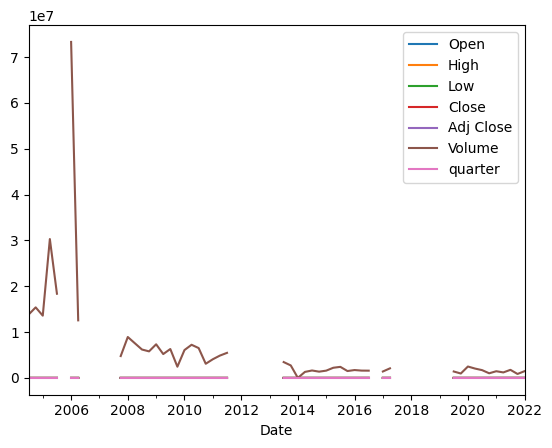

In [40]:
df.asfreq("Q").plot()

/tmp/ipykernel_18/3763366494.py:1: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df["Close"].asfreq("Q").plot()


<Axes: xlabel='Date'>

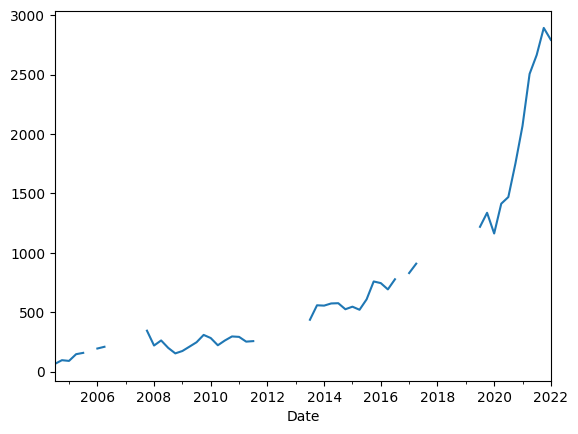

In [41]:
df["Close"].asfreq("Q").plot()

**Resampling**
Resampling involves changing the frequency of your time series observations.

*Two types of resampling are:*

* Upsampling: Where you increase the frequency of the samples, such as from minutes to seconds.
* Downsampling: Where you decrease the frequency of the samples, such as from days to months.


/tmp/ipykernel_18/1462196361.py:3: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  df["Close"].resample("W").mean().plot()
/tmp/ipykernel_18/1462196361.py:5: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df["Close"].resample("Y").mean().plot()
/tmp/ipykernel_18/1462196361.py:5: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  df["Close"].resample("Y").mean().plot()


<Axes: xlabel='Date'>

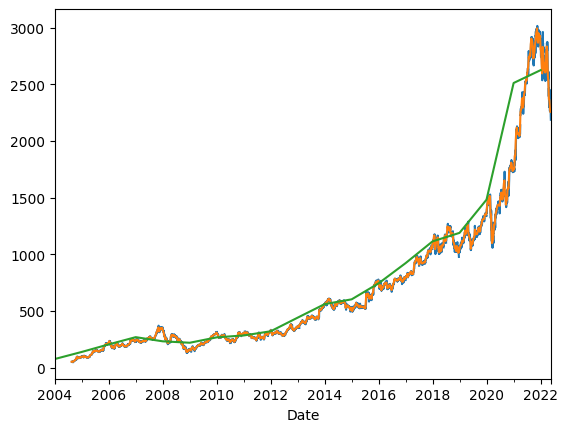

In [42]:
# Downsample Used only if data is noisy
df["Close"].plot()
df["Close"].resample("W").mean().plot()
#df["Close"].resample("Q").mean().plot()
df["Close"].resample("Y").mean().plot()

/tmp/ipykernel_18/1731355297.py:7: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df["Close"].resample("12H").interpolate(method='spline',order=2).plot()# 12hrs


<Axes: xlabel='Date'>

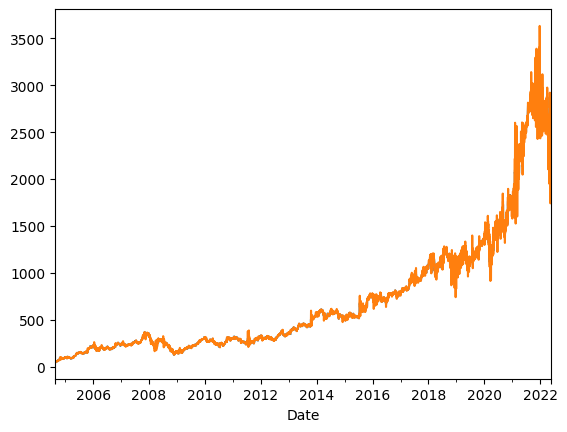

In [43]:
# upsampling  is rare we are increasing the frencncy
df["Close"].plot()
#df["Close"].resample("H").interpolate(method='linear')

#df["Close"].resample("H").interpolate(method='spline',order=2).plot()# filled with pilynomial 
#df["Close"].resample("6H").interpolate(method='spline',order=2).plot()# 6hr
df["Close"].resample("12H").interpolate(method='spline',order=2).plot()# 12hrs 

**Rolling Window***(Smoothing)*
Time series data in original format can be quite volatile, especially on smaller aggregation levels. The concept of rolling, or moving averages is a useful technique for smoothing time series data

In [44]:
print(df["Close"].rolling(3).mean()) # .rolling.aggregate function
print(df["Close"])

Date
2004-08-19            NaN
2004-08-20            NaN
2004-08-23      52.810387
2004-08-24      53.562567
2004-08-25      53.179006
                 ...     
2022-05-16    2296.460043
2022-05-17    2320.063395
2022-05-18    2292.633382
2022-05-19    2265.653320
2022-05-20    2216.396647
Freq: B, Name: Close, Length: 4632, dtype: float64
Date
2004-08-19      49.982655
2004-08-20      53.952770
2004-08-23      54.495735
2004-08-24      52.239197
2004-08-25      52.802086
                 ...     
2022-05-16    2295.850098
2022-05-17    2334.030029
2022-05-18    2248.020020
2022-05-19    2214.909912
2022-05-20    2186.260010
Freq: B, Name: Close, Length: 4632, dtype: float64


<Axes: xlabel='Date'>

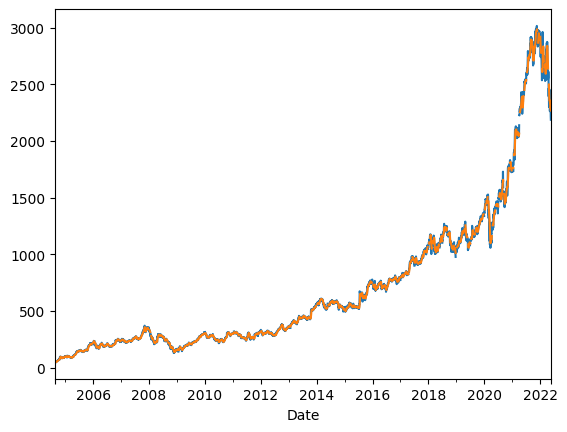

In [45]:
df["Close"].plot()
df["Close"].rolling(7).mean().plot()

<Axes: xlabel='Date'>

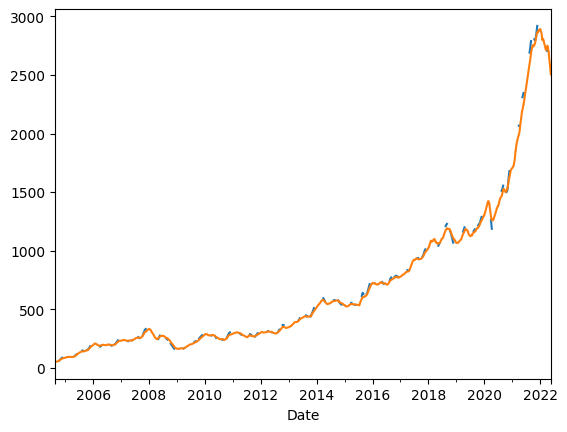

In [46]:
#exponetial moving average

df["Close"].rolling(30).mean().plot()
df["Close"].ewm(30).mean().plot()




**Shifting**
The shift() function is Pandas is used to, well, shift the entire series up or down by the desired number of periods.

**Shifting****
The shift() function is Pandas is used to, well, shift the entire series up or down by the desired number of periods.

In [47]:
#shift
df["Close"].shift(1)

Date
2004-08-19            NaN
2004-08-20      49.982655
2004-08-23      53.952770
2004-08-24      54.495735
2004-08-25      52.239197
                 ...     
2022-05-16    2330.310059
2022-05-17    2295.850098
2022-05-18    2334.030029
2022-05-19    2248.020020
2022-05-20    2214.909912
Freq: B, Name: Close, Length: 4632, dtype: float64

In [48]:
df["Close"].shift(-1)

Date
2004-08-19      53.952770
2004-08-20      54.495735
2004-08-23      52.239197
2004-08-24      52.802086
2004-08-25      53.753517
                 ...     
2022-05-16    2334.030029
2022-05-17    2248.020020
2022-05-18    2214.909912
2022-05-19    2186.260010
2022-05-20            NaN
Freq: B, Name: Close, Length: 4632, dtype: float64

Usage of shifting 





In [49]:
# shift example
df = pd.read_csv('/kaggle/input/time-series-analysis/login.csv',header=None)
df = df[[1,2]]
df.head()
df.rename(columns={1:'user_id',2:'login_time'},inplace=True)
df.head()

,user_id,login_time
0,466,2017-01-07 18:24:07
1,466,2017-01-07 18:24:55
2,458,2017-01-07 18:25:18
3,458,2017-01-07 18:26:21
4,592,2017-01-07 19:09:59


In [50]:
userdf=df[df["user_id"]==413 ]
userdf

,user_id,login_time
11,413,2017-01-09 12:29:25
12,413,2017-01-09 12:40:39
14,413,2017-01-09 14:08:04
33,413,2017-01-10 14:36:23
35,413,2017-01-10 15:22:45
...,...,...
2958,413,2017-12-29 18:20:32
2963,413,2017-12-30 13:41:21
2974,413,2018-01-01 15:16:25
2982,413,2018-01-02 18:15:45


In [51]:
# find this user avg returning time 

userdf["login_time"]= pd.to_datetime(userdf["login_time"])
userdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 222 entries, 11 to 2997
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     222 non-null    int64         
 1   login_time  222 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.2 KB


/tmp/ipykernel_18/3316274494.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userdf["login_time"]= pd.to_datetime(userdf["login_time"])


In [52]:
userdf["shifted"]=userdf["login_time"].shift(1)
userdf

/tmp/ipykernel_18/3786847037.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userdf["shifted"]=userdf["login_time"].shift(1)


,user_id,login_time,shifted
11,413,2017-01-09 12:29:25,NaT
12,413,2017-01-09 12:40:39,2017-01-09 12:29:25
14,413,2017-01-09 14:08:04,2017-01-09 12:40:39
33,413,2017-01-10 14:36:23,2017-01-09 14:08:04
35,413,2017-01-10 15:22:45,2017-01-10 14:36:23
...,...,...,...
2958,413,2017-12-29 18:20:32,2017-12-29 18:19:48
2963,413,2017-12-30 13:41:21,2017-12-29 18:20:32
2974,413,2018-01-01 15:16:25,2017-12-30 13:41:21
2982,413,2018-01-02 18:15:45,2018-01-01 15:16:25


In [53]:
# now i can just substract the values od one column with other 
(userdf["login_time"]-userdf["shifted"]).mean()

Timedelta('1 days 15:05:13.384615384')

In [54]:
# '1 days 15:05:13.384615384' is his return  time on insta or any website 
# we can chck that how many users are comming on  our website and at what times 
#if we do it for all the users and find out the mean of it 
# 